In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tensorflow.keras.datasets import mnist

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
x_train.shape

(60000, 28, 28)

CNN需要定義channel的數量  
灰階圖片只有一個channel(彩色圖片有三個，即RGB)，因此要對維度做修改：(n, 28, 28) --> (n, 28, 28, 1)

In [11]:
#x_train = x_train.reshape(-1, x_train.shape[1], x_train.shape[2], 1) / 255
x_train = x_train.reshape(60000, 28, 28, 1) / 255
#x_train.shape

(60000, 28, 28, 1)

In [13]:
x_test = x_test.reshape(10000, 28, 28, 1) / 255
#x_test.shape

(10000, 28, 28, 1)

In [14]:
x_train[28].shape

(28, 28, 1)

In [15]:
y_train[87]

9

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 讀入必要的函式

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D # CNN會用到的layer
    # Conv2D的2D代表每個「記分板(kernal)」的維度 
    # 如果輸入的是2D圖片(無論是灰階或是彩色)都是用Conv2D，輸入的是3D的立體圖片用Conv3D
    # Conv2D輸入的是三維數據(width, height, channels)；Conv3D輸入的是四維數據(width, height, depth, channels)
from tensorflow.keras.layers import Dense, Flatten # dense = 全連結神經層
from tensorflow.keras.optimizers import SGD # 最標準的學習方式：隨機梯度下降法

### Step 1 打造函數學習機 (CNN)

In [44]:
model = Sequential() # 打開一個空白的函數學習機

In [45]:
model.add(Conv2D(16, (3,3), padding = 'same', input_shape = (28,28,1), activation = 'relu')) 
    # padding = 'same': 輸入的維度是多少，無論filter的大小，輸出的維度就是多少

In [46]:
# 輸出 16 個 28 * 28 矩陣
# 輸出的維度應該要是 (28, 28, 16)

In [47]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [48]:
# 輸出的維度應該要是(14, 14, 16)

In [49]:
model.add(Conv2D(32, (3,3), padding = 'same', activation = 'relu'))

In [50]:
# 輸出的維度應該要是 (14, 14, 32)
# 問題：為何輸出的維度不是(14, 14, 16 * 32)? 
# --> 因為每個filter的16個channel(輸入有幾個channel就有幾個)會掃過所有和channel對應矩陣後把同一個位置(格子)的結果「全部加起來」

In [51]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [52]:
# 輸出的維度應該要是(7, 7, 32)

In [53]:
model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))

In [54]:
# 輸出的維度應該要是(7, 7, 64)

In [55]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [56]:
# 輸出的維度應該要是(3, 3, 64)

In [57]:
model.add(Flatten())

In [58]:
# 輸出的維度應該要是3 * 3 * 64 = 576

In [59]:
model.add(Dense(54, activation = 'relu'))

In [60]:
model.add(Dense(10, activation = 'softmax'))

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

In [64]:
### 手動計算每一層有幾個參數，以及神經網路一共有幾個權重要調 ###
# 第一個Conv2D層：(3 * 3 + 1(bias)) * 16 = 160
# 第二個Conv2D層：(16 * 3 * 3 + 1(bias)) * 32 = 4640
# 第三個Conv2D層：(32 * 3 * 3 + 1(bias)) * 64 = 18496
# 第一個全連結層：(576 + 1(bias)) * 54 = 31158
# 第二個全連結層：(54 + 1(bias)) * 10 = 550
# 全部加起來等於55004

In [62]:
model.compile(loss = 'mse', optimizer = SGD(lr = 0.087), metrics = ['accuracy'])

### Step 2. fit

In [63]:
model.fit(x_train, y_train, batch_size = 128, epochs = 12)

Epoch 1/12
60000/60000 [==============================] - 13s 219us/sample - loss: 0.0898 - acc: 0.1079
Epoch 2/12
60000/60000 [==============================] - 10s 166us/sample - loss: 0.0893 - acc: 0.1298
Epoch 3/12
60000/60000 [==============================] - 10s 166us/sample - loss: 0.0883 - acc: 0.3108
Epoch 4/12
60000/60000 [==============================] - 10s 166us/sample - loss: 0.0833 - acc: 0.5149
Epoch 5/12
60000/60000 [==============================] - 10s 167us/sample - loss: 0.0422 - acc: 0.7469
Epoch 6/12
60000/60000 [==============================] - 10s 166us/sample - loss: 0.0185 - acc: 0.8832
Epoch 7/12
60000/60000 [==============================] - 10s 166us/sample - loss: 0.0135 - acc: 0.9140
Epoch 8/12
60000/60000 [==============================] - 10s 175us/sample - loss: 0.0110 - acc: 0.9292
Epoch 9/12
60000/60000 [==============================] - 10s 167us/sample - loss: 0.0096 - acc: 0.9377
Epoch 10/12
60000/60000 [==============================] - 10s 1

### Step 3. 預測

In [65]:
result = model.predict_classes(x_test)

In [67]:
print(result[87], y_test[87])

3 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [70]:
def my_predict(n):
    print('我可愛的 CNN 預測是', result[n])
    X = x_test[n].reshape(28,28)
    plt.imshow(X, cmap = 'Greys')

我可愛的 CNN 預測是 9


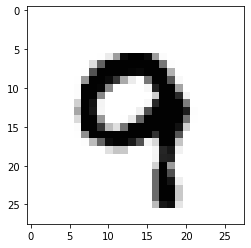

In [71]:
my_predict(99)

In [77]:
from ipywidgets import interact_manual

In [78]:
interact_manual(my_predict, n = (0, 9999)) # (要互動的函數, 輸入的範圍)

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict(n)>

In [79]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 104us/sample - loss: 0.0063 - acc: 0.9595


In [81]:
loss, acc = score

In [83]:
print('測試資料的正確率為', acc)

測試資料的正確率為 0.9595


### 把我們的model存起來

In [84]:
model.save('myCNNmodel.h5')